In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.api import UnobservedComponents

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
m2 = web.DataReader(name='M2NS', data_source='fred', start='1990-01-01')
y = np.log(m2)

<Axes: xlabel='DATE'>

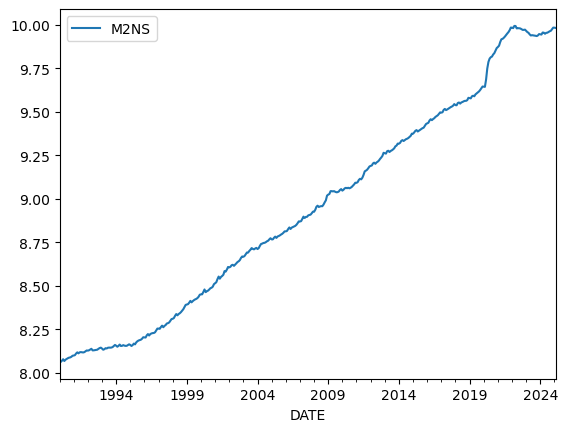

In [3]:
y.plot()

In [4]:
mod = UnobservedComponents(y, level=True, trend=True, seasonal=6, cycle=False, stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True, stochastic_cycle=False)
res = mod.fit()
# res.summary()

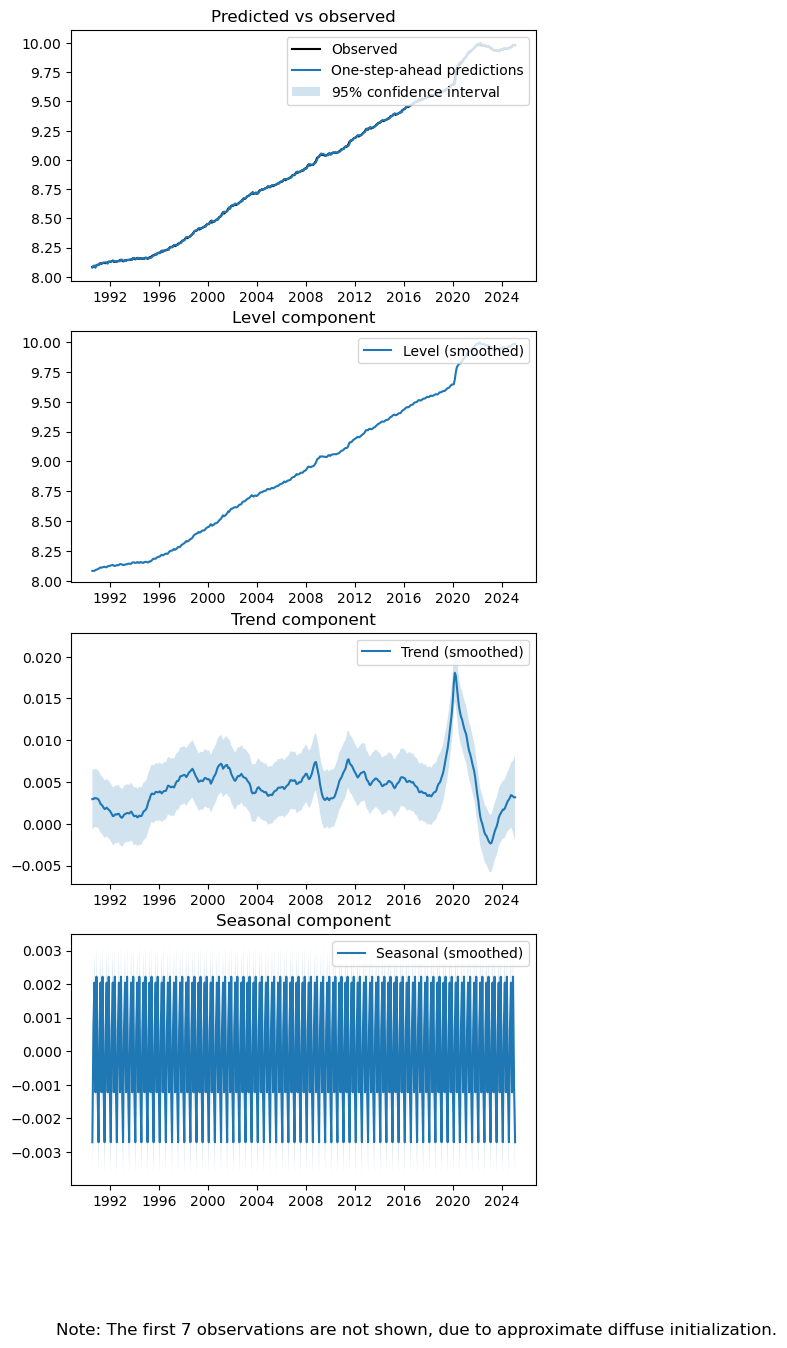

In [5]:
res.plot_components(figsize=(6, 15))
plt.show()

In [6]:
cycle, trend = hpfilter(y, lamb=1600)

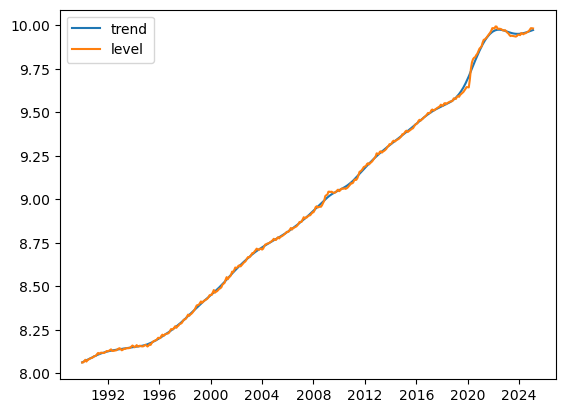

In [7]:
plt.plot(trend, label='trend')
plt.plot(y, label='level')
plt.legend()
plt.show()

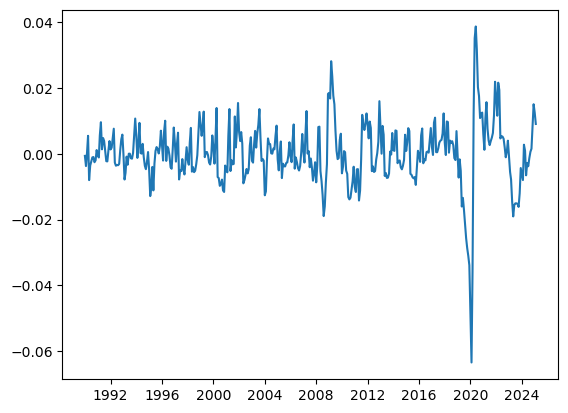

In [8]:
plt.plot(cycle)
plt.show()

In [9]:
stl = STL(y, seasonal=9)
res1 = stl.fit()

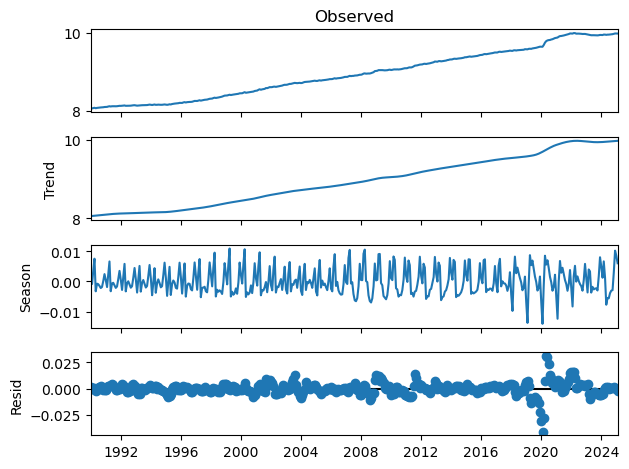

In [10]:
res1.plot()
plt.show()

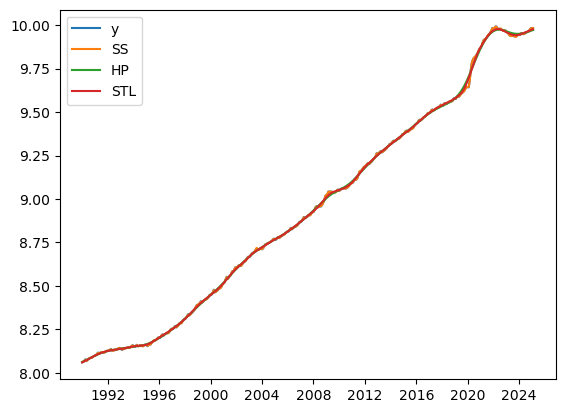

In [11]:
plt.plot(y, label='y')
plt.plot(pd.Series(res.level['smoothed'], index=trend.index), label='SS')
plt.plot(trend, label='HP')
plt.plot(res1.trend, label='STL')
plt.legend()
plt.show()

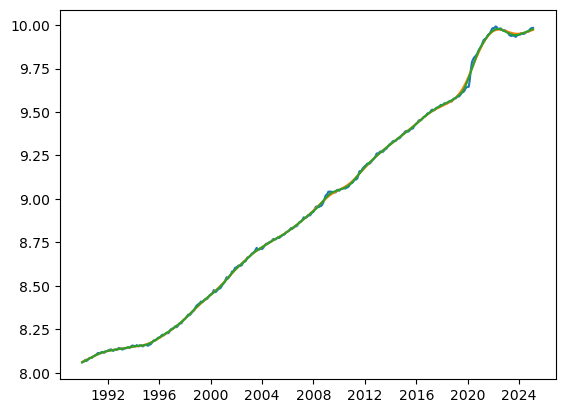

In [12]:
plt.plot(pd.Series(res.level['smoothed'], index=trend.index), label='SS')
plt.plot(trend, label='HP')
plt.plot(res1.trend, label='STL')
plt.show()